In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_diabetes

In [2]:
from sklearn.datasets import load_diabetes
#載入數據集
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [3]:
import pandas as pd

feature = pd.DataFrame(data['data'], columns = data["feature_names"])
target = pd.DataFrame( data['target'], columns = ["target"])
df = pd.concat([feature,target], axis=1)

In [4]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
target

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [6]:
feature

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [7]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


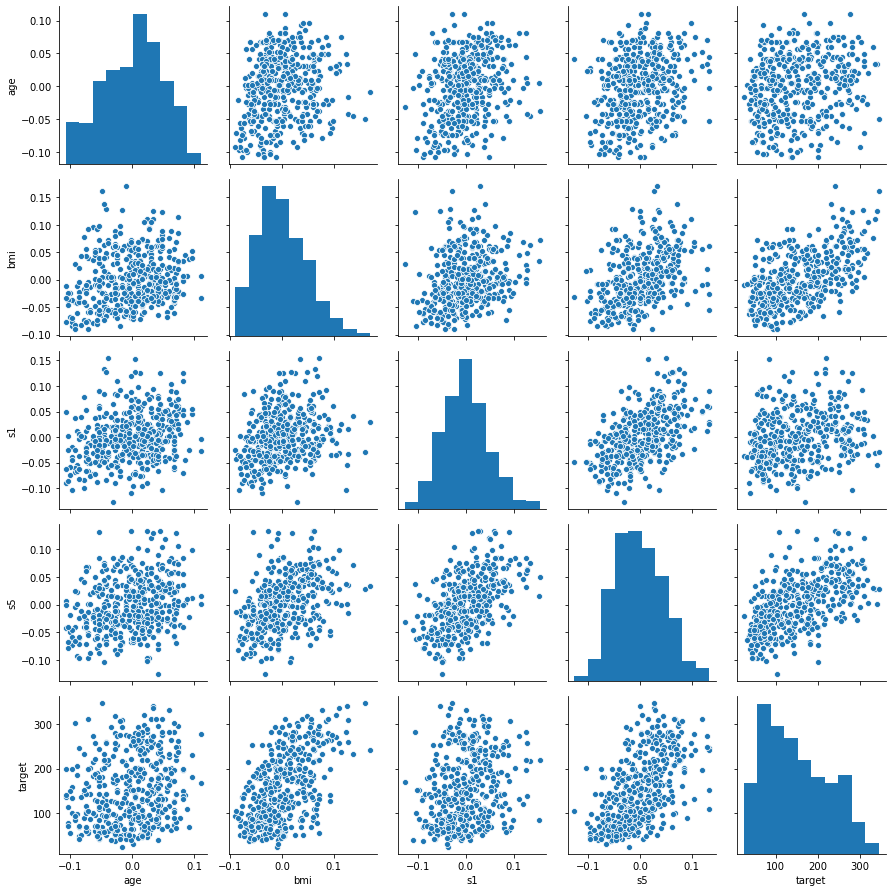

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age','bmi','s1','s5','target']

sns.pairplot(df[cols])
plt.tight_layout()
plt.savefig('scatterplot.png',dpi=300)
plt.show()

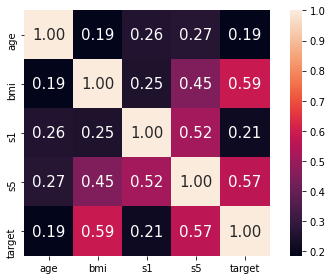

In [9]:
import numpy as np
# python 預設以row計算，所以要.T
#Ssklearn 需要arrat,所以要.values

#cbar框
cm = np.corrcoef(df[cols].values.T)
#sns.set(front_size=15)
hm= sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels=cols,
                xticklabels=cols
               )
plt.tight_layout()
plt.savefig('correlation.png',doi=300)
plt.show()

In [10]:
#將糖尿病數據集分成training set 及 test set
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X,y = load_diabetes().data , load_diabetes().target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=8) 
#random_state=8 = random.seed(8)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import r2_score

slr = LinearRegression()
#訓練模型，高維的線
slr.fit(X_train,y_train)
#slr.coef_ 係數
print(slr.coef_)

y_train_pred = slr.predict(X_train) # 存對應的(X_train)點在線上
y_test_pred = slr.predict(X_test)   # 存對應的(X_test)點在線上

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[   11.5106203   -282.51347161   534.20455671   401.73142674
 -1043.89718398   634.92464089   186.43262636   204.93373199
   762.47149733    91.9460394 ]
MSE train: 2812.369, test: 3108.041
R^2 train: 0.530, test: 0.459


In [12]:
# MSE : 均方誤差
# R^2 是 MSE 的標準化
# S1和target呈現負相關 : -1043.89718398 ->強負相關
# 熱度圖 s1和target : 0.21 ->看出和觀察值不同
# 迴歸模型的係數和觀察值差異大(s1,s2) -> 出來的模型有問題

In [13]:
# 該模型假設每一因子互相獨立
# 比較模型tain-test, 係數  

In [14]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [15]:
# 丟進去因子有共線性 ->當自變項之間的相關性太高的時候會產生 : s1和s2相關為 0.896663

## 脊回歸(Ridge regression)
增加逞罰項，避免overfitting

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train) # 存對應的(X_train)點在線上
y_test_pred = ridge.predict(X_test)   # 存對應的(X_test)點在線上

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[  36.8262072   -75.80823733  282.42652716  207.39314972   -1.46580263
  -27.81750835 -134.3740951    98.97724793  222.67543268  117.97255343]
MSE train: 3397.720, test: 3262.233
R^2 train: 0.433, test: 0.433


In [17]:
# train-test變小，代表泛化(新的數據)表現比較好
# 要泛化選擇 ridge regression
# 要表現比較好選擇 linear regression

In [18]:
# alpha = 10
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10).fit(X_train,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train) # 存對應的(X_train)點在線上
y_test_pred = ridge.predict(X_test)   # 存對應的(X_test)點在線上

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[ 15.08676646  -1.9586191   60.69903425  47.11843221  14.72337546
   9.87779644 -35.56015266  35.74603575  54.27193163  37.42095846]
MSE train: 5083.146, test: 4817.252
R^2 train: 0.151, test: 0.162


In [19]:
# alpha = 0.1
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train,y_train)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train) # 存對應的(X_train)點在線上
y_test_pred = ridge.predict(X_test)   # 存對應的(X_test)點在線上

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[  24.77802114 -228.33364296  495.54594378  361.21481169 -109.82542594
  -78.3286822  -190.69780344  108.24040795  383.72269392  107.42593373]
MSE train: 2865.170, test: 3027.227
R^2 train: 0.522, test: 0.473


In [20]:
# 脊回歸 解釋變數時，因為多了逞罰項，變數增加，模型較複雜

## Lasso model

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train) 
y_test_pred = lasso.predict(X_test)   

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[  0.          -0.         384.73421807  72.69325545   0.
   0.          -0.           0.         247.88881314   0.        ]
MSE train: 3818.201, test: 3646.836
R^2 train: 0.362, test: 0.366


In [22]:
#alpha = 0.1 7features
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train) 
y_test_pred = lasso.predict(X_test)   

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[   0.         -181.40911617  537.71961152  355.19720303 -105.43471481
   -0.         -198.99829878    0.          440.25133426   48.25573121]
MSE train: 2877.650, test: 2989.599
R^2 train: 0.519, test: 0.480


In [23]:
#alpha = 0.01
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train,y_train)
print(lasso.coef_)

y_train_pred = lasso.predict(X_train) 
y_test_pred = lasso.predict(X_test)   

print( "MSE train: %.3f, test: %.3f"  % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))
print( "R^2 train: %.3f, test: %.3f"  % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

[   0.         -181.40911617  537.71961152  355.19720303 -105.43471481
   -0.         -198.99829878    0.          440.25133426   48.25573121]
MSE train: 2877.650, test: 2989.599
R^2 train: 0.519, test: 0.480


In [25]:
type(lasso)

sklearn.linear_model._coordinate_descent.Lasso

In [ ]:
# train > test 代表overfiting